In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [20]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [54]:
#make new list of pH data without the NaN values
dict={'Time': times, 'ph': phs} #make dictionary of time and ph
df = pd.DataFrame(dict) #make dataframe
df.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs_2 = df['ph'].tolist() 
timeph = df['Time'].tolist()

In [61]:
#Can find the minimum and maximum values using min and max functions
#Can determine index of these values using the index function
vals=[]
dates=[]
vals.append(min(temps))
vals.append(min(co2s))
vals.append(min(sea_ice_exts))
vals.append(min(phs_2))
vals.append(max(temps))
vals.append(max(co2s))
vals.append(max(sea_ice_exts))
vals.append(max(phs_2))

temp_min = temps.index(min(temps))
co2_min = co2s.index(min(co2s))
ext_min = sea_ice_exts.index(min(sea_ice_exts))
pH_min = phs.index(min(phs_2))
temp_max = temps.index(max(temps))
co2_max = co2s.index(max(co2s))
ext_max = sea_ice_exts.index(max(sea_ice_exts))
pH_max = phs.index(max(phs_2))

dates.append(times[temp_min])
dates.append(times[co2_min])
dates.append(times[ext_min])
dates.append(times[pH_min])
dates.append(times[temp_max])
dates.append(times[co2_max])
dates.append(times[ext_max])
dates.append(times[pH_max])

dates[7]

1994.042

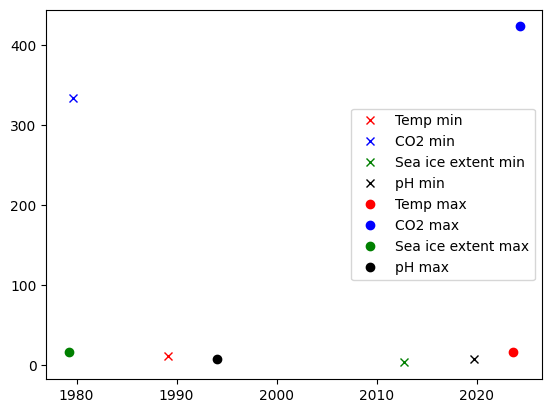

In [63]:
x=[1,2,3]
y=[3,4,5]

plt.plot(dates[0],vals[0],'x',color='r',label='Temp min')
plt.plot(dates[1],vals[1],'x',color='b',label='CO2 min')
plt.plot(dates[2],vals[2],'x',color='g',label='Sea ice extent min')
plt.plot(dates[3],vals[3],'x',color='k',label='pH min')
plt.plot(dates[4],vals[4],'o',color='r',label='Temp max')
plt.plot(dates[5],vals[5],'o',color='b',label='CO2 max')
plt.plot(dates[6],vals[6],'o',color='g',label='Sea ice extent max')
plt.plot(dates[7],vals[7],'o',color='k',label='pH max')
plt.legend()